### This is a demo for artpop for showing a color magnitude diagram of a *simple* composite stellar population with magnitude in I band versus V-I as axes, and finding the magnitude of the TRGB (last cell is the answer).

In [1]:
# Third-party imports 
import numpy as np
import matplotlib.pyplot as plt 
from astropy import units as u 
  

# Project import
import artpop

# artpop's matplotlib style
plt.style.use(artpop.mpl_style)

# use this random state for reproducibility
rng = np.random.RandomState(112)

# setup for ages, photometric system, and etc.
imf = 'kroupa'  # initial mass function
phot_system = 'UBVRIplus'
log_ages_grid = artpop.MISTIsochrone._log_age_grid[40:-3]
feh_grid = [-1.5]

print(artpop.filters.get_filter_names('UBVRIplus'))

['Bessell_U', 'Bessell_B', 'Bessell_V', 'Bessell_R', 'Bessell_I', '2MASS_J', '2MASS_H', '2MASS_Ks', 'Kepler_Kp', 'Kepler_D51', 'Hipparcos_Hp', 'Tycho_B', 'Tycho_V', 'Gaia_G_DR2Rev', 'Gaia_BP_DR2Rev', 'Gaia_RP_DR2Rev', 'Gaia_G_MAW', 'Gaia_BP_MAWb', 'Gaia_BP_MAWf', 'Gaia_RP_MAW', 'TESS']


We then use the make composite stellar population using 3 SSPs:

In [2]:
RGB_metal = []
AGB_metal = []
I_AGB = [] 
B_AGB = []
V_AGB = []
H_AGB = []
J_AGB = []
K_AGB = []
I_RGB = []
B_RGB = []
V_RGB = []
H_RGB = []
J_RGB = []
K_RGB = []
I_PAGB = []
B_PAGB = []
V_PAGB = []
H_PAGB = []
J_PAGB = []
K_PAGB = []

I_AGB_young = [] 
B_AGB_young = []
V_AGB_young = []
H_AGB_young = []
J_AGB_young = []
K_AGB_young = []
I_RGB_young = []
B_RGB_young = []
V_RGB_young = []
H_RGB_young = []
J_RGB_young = []
K_RGB_young = []
I_PAGB_young = []
B_PAGB_young = []
V_PAGB_young = []
H_PAGB_young = []
J_PAGB_young = []
K_PAGB_young = []

I_AGB_old = [] 
B_AGB_old = []
V_AGB_old = []
H_AGB_old = []
J_AGB_old = []
K_AGB_old = []
I_RGB_old = []
B_RGB_old = []
V_RGB_old = []
H_RGB_old = []
J_RGB_old = []
K_RGB_old = []
I_PAGB_old = []
B_PAGB_old = []
V_PAGB_old = []
H_PAGB_old = []
J_PAGB_old = []
K_PAGB_old = []

for feh_i in feh_grid:
    
    ssp_intermediate = artpop.MISTSSP(
        log_age = 9.4,        # log of age in years
        feh = feh_i,             # metallicity [Fe/H]
        phot_system = phot_system, # photometric system(s)
        num_stars = 2e6,      # number of stars
        random_state = rng,   # random state for reproducibility
        ab_or_vega = 'vega'   # Vega mag system
    )
    RGB_intermediate = ssp_intermediate.select_phase('RGB')
    AGB_intermediate = ssp_intermediate.select_phase('AGB')
    PAGB_intermediate = ssp_intermediate.select_phase('postAGB')
    # ssps_metal.append(ssp_intermediate)
    I_AGB.append(ssp_intermediate.star_mags('Bessell_I')[AGB_intermediate])
    B_AGB.append(ssp_intermediate.star_mags('Bessell_B')[AGB_intermediate])
    V_AGB.append(ssp_intermediate.star_mags('Bessell_V')[AGB_intermediate])
    H_AGB.append(ssp_intermediate.star_mags('2MASS_H')[AGB_intermediate])
    J_AGB.append(ssp_intermediate.star_mags('2MASS_J')[AGB_intermediate])
    K_AGB.append(ssp_intermediate.star_mags('2MASS_Ks')[AGB_intermediate])
    I_RGB.append(ssp_intermediate.star_mags('Bessell_I')[RGB_intermediate])
    B_RGB.append(ssp_intermediate.star_mags('Bessell_B')[RGB_intermediate])
    V_RGB.append(ssp_intermediate.star_mags('Bessell_V')[RGB_intermediate])
    H_RGB.append(ssp_intermediate.star_mags('2MASS_H')[RGB_intermediate])
    J_RGB.append(ssp_intermediate.star_mags('2MASS_J')[RGB_intermediate])
    K_RGB.append(ssp_intermediate.star_mags('2MASS_Ks')[RGB_intermediate])
    I_PAGB.append(ssp_intermediate.star_mags('Bessell_I')[PAGB_intermediate])
    B_PAGB.append(ssp_intermediate.star_mags('Bessell_B')[PAGB_intermediate])
    V_PAGB.append(ssp_intermediate.star_mags('Bessell_V')[PAGB_intermediate])
    H_PAGB.append(ssp_intermediate.star_mags('2MASS_H')[PAGB_intermediate])
    J_PAGB.append(ssp_intermediate.star_mags('2MASS_J')[PAGB_intermediate])
    K_PAGB.append(ssp_intermediate.star_mags('2MASS_Ks')[PAGB_intermediate])
    
    ssp_young = artpop.MISTSSP(
        log_age = 8.2,        # log of age in years
        feh = feh_i,             # metallicity [Fe/H]
        phot_system = phot_system, # photometric system(s)
        num_stars = 1e6,      # number of stars
        random_state = rng,   # random state for reproducibility
        ab_or_vega = 'vega'   # Vega mag system
    )
    RGB_young = ssp_young.select_phase('RGB')
    AGB_young = ssp_young.select_phase('AGB')
    PAGB_young = ssp_young.select_phase('postAGB')
    # ssps_metal.append(ssp_intermediate)
    I_AGB_young.append(ssp_young.star_mags('Bessell_I')[AGB_young])
    B_AGB_young.append(ssp_young.star_mags('Bessell_B')[AGB_young])
    V_AGB_young.append(ssp_young.star_mags('Bessell_V')[AGB_young])
    H_AGB_young.append(ssp_young.star_mags('2MASS_H')[AGB_young])
    J_AGB_young.append(ssp_young.star_mags('2MASS_J')[AGB_young])
    K_AGB_young.append(ssp_young.star_mags('2MASS_Ks')[AGB_young])
    I_RGB_young.append(ssp_young.star_mags('Bessell_I')[RGB_young])
    B_RGB_young.append(ssp_young.star_mags('Bessell_B')[RGB_young])
    V_RGB_young.append(ssp_young.star_mags('Bessell_V')[RGB_young])
    H_RGB_young.append(ssp_young.star_mags('2MASS_H')[RGB_young])
    J_RGB_young.append(ssp_young.star_mags('2MASS_J')[RGB_young])
    K_RGB_young.append(ssp_young.star_mags('2MASS_Ks')[RGB_young])
    I_PAGB_young.append(ssp_young.star_mags('Bessell_I')[PAGB_young])
    B_PAGB_young.append(ssp_young.star_mags('Bessell_B')[PAGB_young])
    V_PAGB_young.append(ssp_young.star_mags('Bessell_V')[PAGB_young])
    H_PAGB_young.append(ssp_young.star_mags('2MASS_H')[PAGB_young])
    J_PAGB_young.append(ssp_young.star_mags('2MASS_J')[PAGB_young])
    K_PAGB_young.append(ssp_young.star_mags('2MASS_Ks')[PAGB_young])
    
    ssp_old = artpop.MISTSSP(
        log_age = 10,        # log of age in years
        feh = feh_i,             # metallicity [Fe/H]
        phot_system = phot_system, # photometric system(s)
        num_stars = 4e6,      # number of stars
        random_state = rng,   # random state for reproducibility
        ab_or_vega = 'vega'   # Vega mag system
    )
    RGB_old = ssp_old.select_phase('RGB')
    AGB_old = ssp_old.select_phase('AGB')
    PAGB_old = ssp_old.select_phase('postAGB')
    # ssps_metal.append(ssp_intermediate)
    I_AGB_old.append(ssp_old.star_mags('Bessell_I')[AGB_old])
    B_AGB_old.append(ssp_old.star_mags('Bessell_B')[AGB_old])
    V_AGB_old.append(ssp_old.star_mags('Bessell_V')[AGB_old])
    H_AGB_old.append(ssp_old.star_mags('2MASS_H')[AGB_old])
    J_AGB_old.append(ssp_old.star_mags('2MASS_J')[AGB_old])
    K_AGB_old.append(ssp_old.star_mags('2MASS_Ks')[AGB_old])
    I_RGB_old.append(ssp_old.star_mags('Bessell_I')[RGB_old])
    B_RGB_old.append(ssp_old.star_mags('Bessell_B')[RGB_old])
    V_RGB_old.append(ssp_old.star_mags('Bessell_V')[RGB_old])
    H_RGB_old.append(ssp_old.star_mags('2MASS_H')[RGB_old])
    J_RGB_old.append(ssp_old.star_mags('2MASS_J')[RGB_old])
    K_RGB_old.append(ssp_old.star_mags('2MASS_Ks')[RGB_old])
    I_PAGB_old.append(ssp_old.star_mags('Bessell_I')[PAGB_old])
    B_PAGB_old.append(ssp_old.star_mags('Bessell_B')[PAGB_old])
    V_PAGB_old.append(ssp_old.star_mags('Bessell_V')[PAGB_old])
    H_PAGB_old.append(ssp_old.star_mags('2MASS_H')[PAGB_old])
    J_PAGB_old.append(ssp_old.star_mags('2MASS_J')[PAGB_old])
    K_PAGB_old.append(ssp_old.star_mags('2MASS_Ks')[PAGB_old])
    





We now try to find the Center of the AGB with J-K vs J:

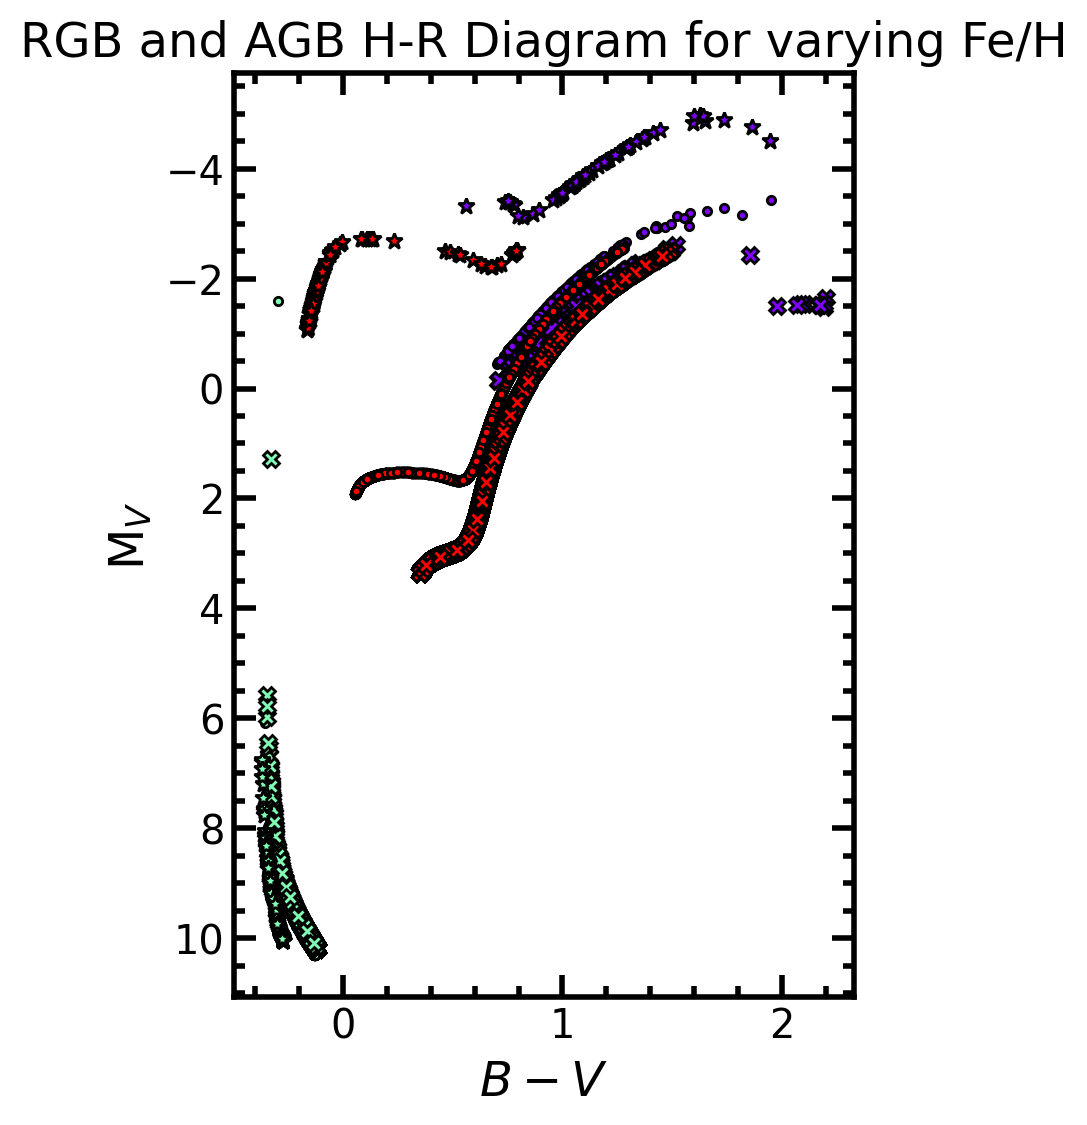

In [3]:
# plot J-K - J for AGB
from matplotlib import cm

plt.figure(figsize=(4, 6), dpi=200)
colors = cm.rainbow(np.linspace(0, 1, 3))

for i in range(len(feh_grid)):
    plt.plot(B_AGB[i] - V_AGB[i], V_AGB[i], '.', c = colors[0], mec='k')
    plt.plot(B_AGB_old[i] - V_AGB_old[i], V_AGB_old[i], 'X', c = colors[0], mec='k')
    plt.plot(B_AGB_young[i] - V_AGB_young[i], V_AGB_young[i], '*', c = colors[0],  mec='k')
    plt.plot(B_PAGB[i] - V_PAGB[i], V_PAGB[i], '.', c = colors[1], mec='k')
    plt.plot(B_PAGB_old[i] - V_PAGB_old[i], V_PAGB_old[i], 'X', c = colors[1], mec='k')
    plt.plot(B_PAGB_young[i] - V_PAGB_young[i], V_PAGB_young[i], '*', c = colors[1],  mec='k')
    plt.plot(B_RGB[i] - V_RGB[i], V_RGB[i], '.', c = colors[2], mec='k')
    plt.plot(B_RGB_old[i] - V_RGB_old[i], V_RGB_old[i], 'X', c = colors[2], mec='k')
    plt.plot(B_RGB_young[i] - V_RGB_young[i], V_RGB_young[i], '*', c = colors[2],  mec='k')



# plt.xlim(0.5,2)
# plt.ylim(-9,-3)
# plt.legend(loc=4, prop={'size': 10})
plt.minorticks_on()
plt.gca().invert_yaxis()
plt.xlabel(r'$B-V$')
plt.ylabel(r'M$_V$')
plt.title("RGB and AGB H-R Diagram for varying Fe/H");


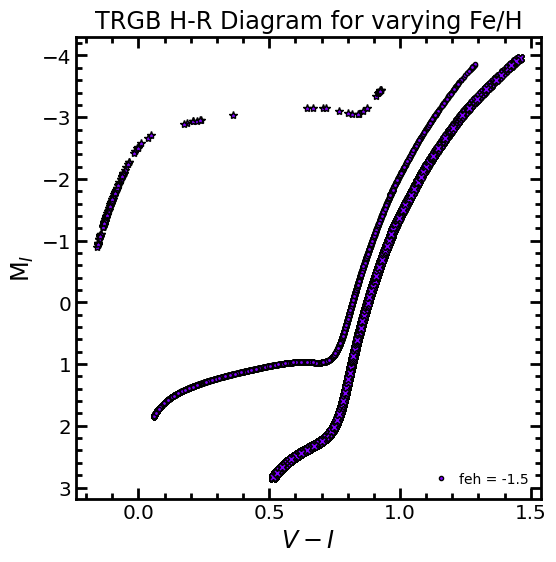

In [4]:
plt.figure(figsize=(6, 6), dpi=100)
colors = cm.rainbow(np.linspace(0, 1, len(feh_grid)))

for i in range(len(feh_grid)):
    label = 'feh = ' + str(feh_grid[i])
    plt.plot(V_RGB[i] - I_RGB[i], I_RGB[i], '.', c = colors[i], label=label, mec='k')
    plt.plot(V_RGB_old[i] - I_RGB_old[i], I_RGB_old[i], 'X', c = colors[i], mec='k')
    plt.plot(V_RGB_young[i] - I_RGB_young[i], I_RGB_young[i], '*', c = colors[i],  mec='k')
    

# plt.xlim(0.5,2)
# plt.ylim(-9,-3)
plt.legend(loc=4, prop={'size': 10})
plt.minorticks_on()
plt.gca().invert_yaxis()
plt.xlabel(r'$V-I$')
plt.ylabel(r'M$_I$')
plt.title("TRGB H-R Diagram for varying Fe/H");

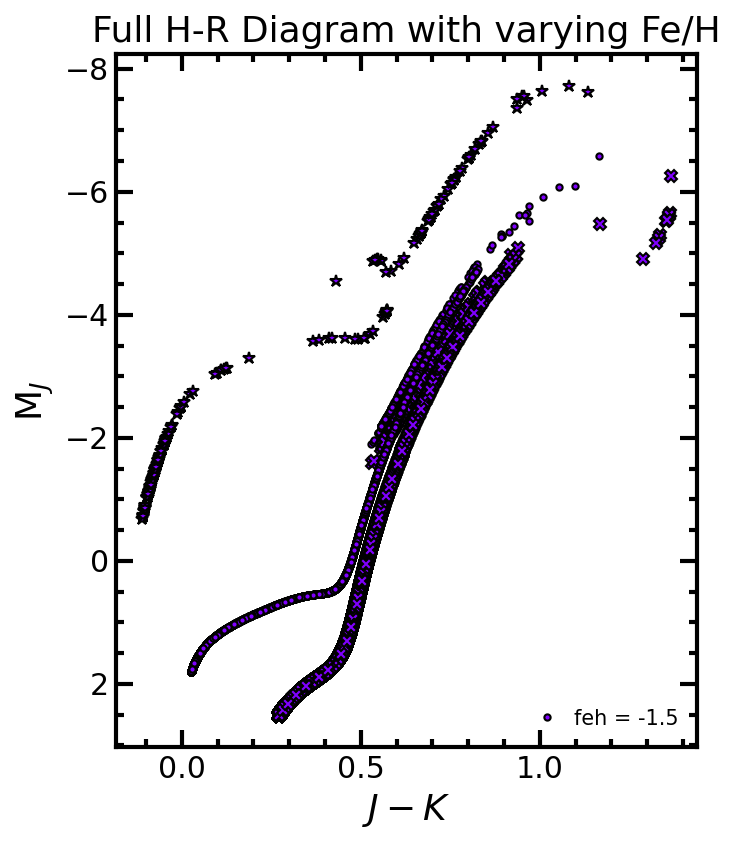

In [5]:
from matplotlib import cm

plt.figure(figsize=(5, 6), dpi=150)
colors = cm.rainbow(np.linspace(0, 1, len(feh_grid)))

for i in range(len(feh_grid)):
    label = 'feh = ' + str(feh_grid[i])
    plt.plot(J_AGB[i] - K_AGB[i], J_AGB[i], '.', c = colors[i], label=label, mec='k')
    plt.plot(J_AGB_old[i] - K_AGB_old[i], J_AGB_old[i], 'X', c = colors[i], mec='k')
    plt.plot(J_AGB_young[i] - K_AGB_young[i], J_AGB_young[i], '*', c = colors[i],  mec='k')
    plt.plot(J_RGB[i] - K_RGB[i], J_RGB[i], '.', c = colors[i],  mec='k')
    plt.plot(J_RGB_old[i] - K_RGB_old[i], J_RGB_old[i], 'X', c = colors[i], mec='k')
    plt.plot(J_RGB_young[i] - K_RGB_young[i], J_RGB_young[i], '*', c = colors[i],  mec='k')
    
plt.legend(loc=4, prop={'size': 10})
plt.minorticks_on()
plt.gca().invert_yaxis()
plt.xlabel(r'$J-K$')
plt.ylabel(r'M$_J$')
plt.title("Full H-R Diagram with varying Fe/H");
    